In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the training.
#---------------------------------------------------------------------


In [4]:
# Upload Dataframes:
qr_mc= quantileRegression("mc")
print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc   = 2000000
print "Load the mc dataframe"
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
#-------------------------------------------------------------
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016D[1])
dfdata = qr_data.getDF()
dfmc = qr_mc.getDF()

Load the mc dataframe
Load the mc dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 0 ,  2000000 ]  out of  11554791
DataFrame size =  2000000
Load the data dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoS

In [5]:
print len(dfmc.index),len(dfdata.index)

2000000 2000000


In [6]:
#selection
dfmc   = dfmc  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfdata   = dfdata  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)')
print len(dfmc.index),len(dfdata.index)

1920498 1856796


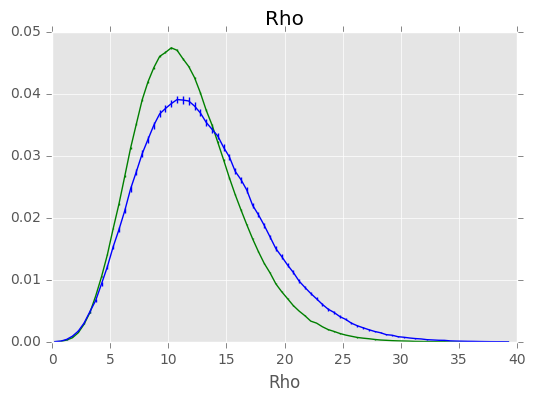

In [7]:
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="g")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="b",Weight=dfmc["weight"])
ax.set_title("Rho")

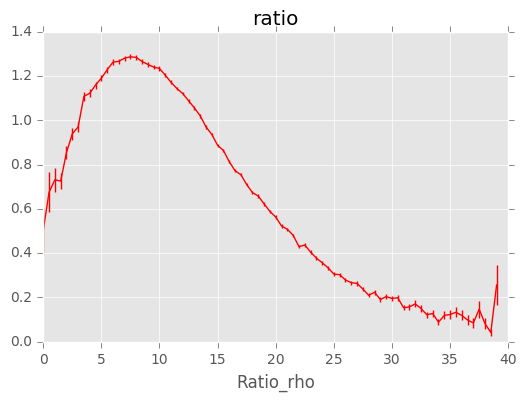

In [8]:
#so the pileup is different for every run, let's do the ratio first:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdata.loc[:,"rho"],dfmc.loc[:,"rho"],rv, Color="r",Weight2=dfmc["weight"])
ratiomc,edge,ratiomcErr= plot.getHistRatio(dfdata.loc[:,"rho"], dfmc.loc[:,"rho"],rv, Weight2=dfmc["weight"])

#ax.set_ylim([0,5])

ax.set_title('ratio')

In [9]:
import pandas as pd
#find corrected value of correction:
dfmc['bin'] = np.digitize(dfmc['rho'],edge)
dfmc["corr"]= ratiomc[dfmc['bin'].values-1]
dfmc["weight"]=dfmc["weight"]*dfmc["corr"]

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

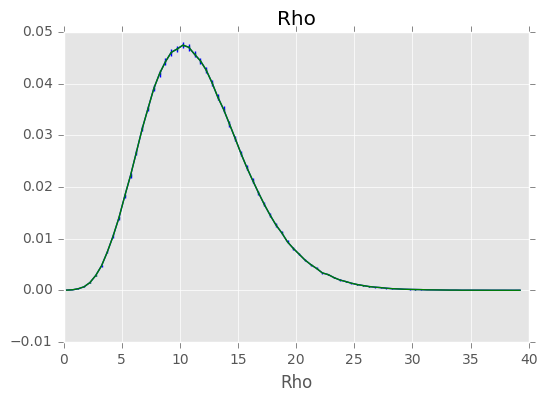

In [10]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="b", Weight=dfmc["weight"])

plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="g",Weight=dfdata["weight"])
ax.set_title("Rho")

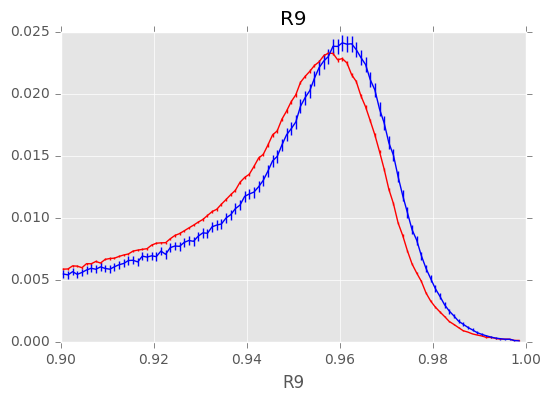

In [11]:
#Check That R9 is still different
rv2 = np.arange(0.9,1.0,0.001)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
plot.plotHistErr(dfdata.loc[:,"R9"], rv2,Color="r",Weight=dfdata["weight"])
plot.plotHistErr(dfmc.loc[:,"R9"], rv2,Color="b",Weight=dfmc["weight"])
ax.set_title('R9')

In [16]:
#set run_period on data given 
period=1
dfdata['runperiod'] = np.ones(len(dfdata.index))*period
dfmc['runperiod'] = np.ones(len(dfmc.index))*period

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
import pandas as pd
#save the new montecarlo and the data in a h5 file:
dfname =  'df_mc_Last_1.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfmc)
hdf.close()

dfname =  'df_data_Last_1.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfdata)
hdf.close()
